<a href="https://colab.research.google.com/github/mikezy/StockPricePredict/blob/master/stockprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#        to predict the closing stock price for Amazon.com Inc, using the past 60 day stock price.

In [2]:
#import the libraries
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [3]:
#Get stock price
df = web.DataReader('AMZN', data_source='yahoo', start='2012-01-01', end='2020-03-04')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2020-02-27,1975.000000,1882.760010,1934.380005,1884.300049,8144000,1884.300049
2020-02-28,1889.760010,1811.130005,1814.630005,1883.750000,9493800,1883.750000
2020-03-02,1954.510010,1870.000000,1906.489990,1953.949951,6761700,1953.949951


In [4]:
#Get the rows and cols
df.shape

(2055, 6)

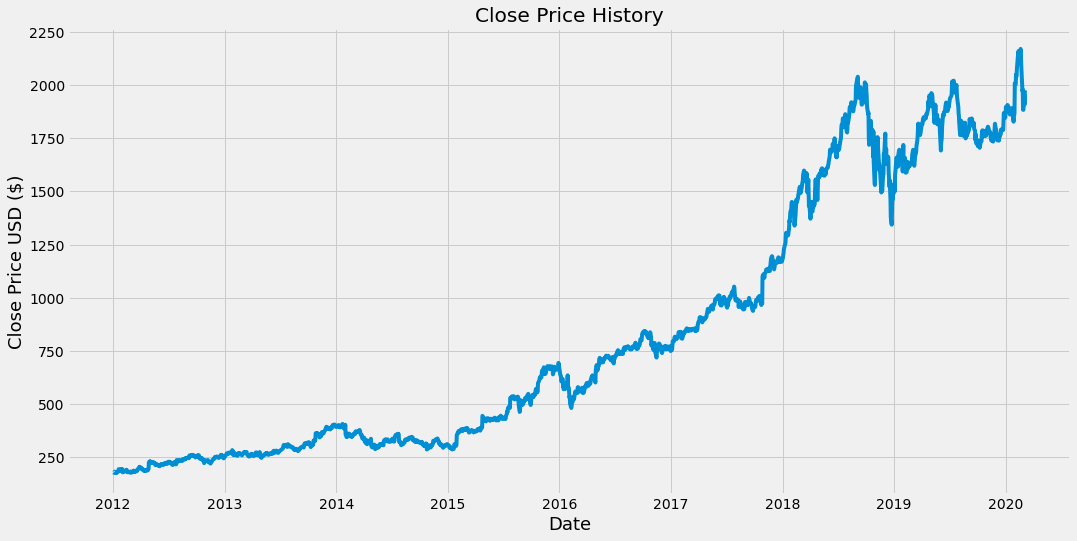

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
#Create a new dataframe with only the Close col
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)

training_data_len

1644

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.55444100e-03],
       [7.92262835e-04],
       [8.42409054e-04],
       ...,
       [8.91555380e-01],
       [8.69011035e-01],
       [9.02526705e-01]])

In [9]:
#Create the training dataset
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()
    

[array([0.00155444, 0.00079226, 0.00084241, 0.00334957, 0.00131877,
       0.00170988, 0.00148925, 0.        , 0.00124857, 0.00287321,
       0.00677435, 0.00928652, 0.00752147, 0.00509455, 0.00555085,
       0.005952  , 0.0087199 , 0.00974783, 0.00813322, 0.0092815 ,
       0.00177006, 0.00290329, 0.00589182, 0.00361533, 0.00414183,
       0.00478867, 0.00453796, 0.00481876, 0.00785242, 0.00770701,
       0.00428223, 0.00200573, 0.00329441, 0.00317406, 0.00233166,
       0.00148424, 0.00160459, 0.00130373, 0.00394627, 0.00188539,
       0.00206088, 0.00168983, 0.0021712 , 0.00258739, 0.00393123,
       0.00587177, 0.00420702, 0.00374068, 0.0043424 , 0.00317406,
       0.00426217, 0.00457306, 0.00480873, 0.00822348, 0.00792262,
       0.00825858, 0.00958236, 0.01350857, 0.01479725, 0.01265112])]
[0.01438106205745425]



In [0]:
#Conver x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1584, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1584/1584 [==============================] - 59s 37ms/step - loss: 0.0016
Epoch 2/10
1584/1584 [==============================] - 56s 35ms/step - loss: 4.1258e-04
Epoch 3/10
1584/1584 [==============================] - 56s 36ms/step - loss: 3.7319e-04
Epoch 4/10
1584/1584 [==============================] - 56s 35ms/step - loss: 3.8928e-04
Epoch 5/10
1584/1584 [==============================] - 56s 35ms/step - loss: 1.9920e-04
Epoch 6/10
1584/1584 [==============================] - 55s 35ms/step - loss: 2.0363e-04
Epoch 7/10
1584/1584 [==============================] - 55s 35ms/step - loss: 1.6947e-04
Epoch 8/10
1584/1584 [==============================] - 57s 36ms/step - loss: 2.3844e-04
Epoch 9/10
1584/1584 [==============================] - 56s 36ms/step - loss: 1.3451e-04
Epoch 10/10
1584/1584 [==============================] - 56s 35ms/step - loss: 1.5387e-04


In [0]:
#Create the testing data set
#Create a new array containing the scaled values from index from 1618 to 2097
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [0]:
#Convert the test data to a numpy array
x_test = np.array(x_test)

In [0]:
#Shape the test data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

35.43876950154404

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


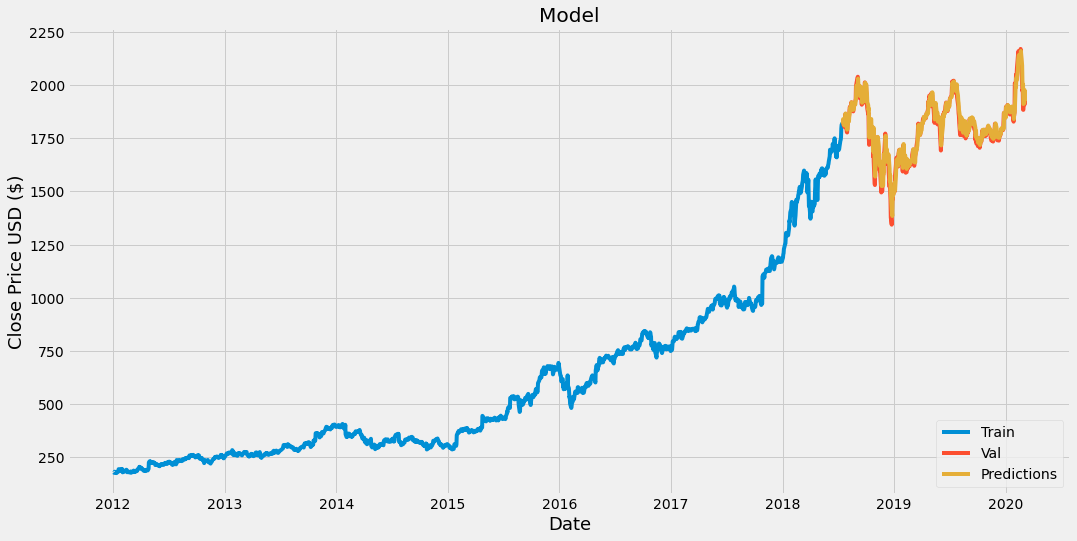

In [20]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [21]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-07-17,1843.930054,1819.562744
2018-07-18,1842.920044,1840.347412
2018-07-19,1812.969971,1839.900146
2018-07-20,1813.699951,1814.202148
2018-07-23,1802.000000,1818.742676
...,...,...
2020-02-27,1884.300049,2002.357422
2020-02-28,1883.750000,1911.221802
2020-03-02,1953.949951,1914.964355


In [22]:
#Get the quote
amzn_quote = web.DataReader('AMZN', data_source='yahoo', start='2012-01-01', end='2020-05-04')
#Create a new dataframe
new_df = amzn_quote.filter(['Close'])
#Get the last 60 day closing price values and conver the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days to X_test
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[2313.6313]]


In [23]:
#Get the quote
amzn_quote2 = web.DataReader('AMZN', data_source='yahoo', start='2020-05-05', end='2020-05-05')
print(amzn_quote2['Close'])

Date
2020-05-05    2317.800049
Name: Close, dtype: float64
